<a href="https://colab.research.google.com/github/junyi2022/musa-650-remote-sensing/blob/main/assignments/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MUSA 650 Homework 1: Basics of Machine Learning

In this assignment, you’ll explore fundamental machine learning concepts and techniques, with a focus on data preprocessing, image manipulation, and model evaluation. You are responsible for figuring out the code independently and may refer to tutorials, code examples, or use AI support, but **please cite all sources**.

Submit a single Jupyter Notebook containing code, narrative text, visualizations, and answers to each question. Open a pull request from your fork of this repository to the main repository for submission.

## Important Notes

- **Sample Size Considerations**: If experiments take too long with the complete dataset, start with a smaller sample for timely execution. For your final submission, use the full dataset if feasible, but if processing is still too intensive, note your sample sizes clearly. Sample size variations will not affect grading if documented appropriately.
- **Data Reshaping**: To switch between 2D and 1D representations, use functions like `numpy.flatten()` or `numpy.resize()` as needed.

**Disclaimer:** I consulted the following AI tool to revise codes and answer questions for this project.

- DeepSeek. (n.d.). DeepSeek artificial intelligence system. Retrieved from https://www.deepseek.com

# 1. Data Exploration

Load the mnist dataset using the following code. The mnist dataset is a collection of 28x28 grayscale images of handwritten digits (0-9). Each image is represented as a 2D array (28 rows and 28 columns), and each pixel is a feature. The y data contains labels for the x data.

In [2]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 1.1 Dimensionality

### 1.1.1 Data Type
The type of the training and testing dataset are numpy n-dimensional array.

In [4]:
type(x_train)
type(x_test)

numpy.ndarray

### 1.1.2 Number of features and samples
The shape of `x_train` and `x_test` is (num_samples, height, width). Therefore, there are 60000 samples in the training dataset and 10000 samples in the testing dataset. Each sample is an image of 28 x 28 = 784 features.

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_test.shape

(10000, 28, 28)

### 1.1.3 Explore `.shape`
If an array has a shape of (100, 28, 28), 100 means the number of images and 28 represent the number of pixels. When flattening the 3D array (100, 28, 28) into a 2D array, I convert each 28x28 image into a 1D array of 784 pixels. The resulting shape will be (100, 784).

### 1.1.4 How to convert from 3D array to 2D array
`flaten()` and `reshape()` can be used to convert a 3D array into a 2D array without changing the total number of elements. Both methods achieve the same goal but differ in how they handle memory and the resulting array.

The `reshape()` function does not create a copy of the data unless necessary, making it memory-efficient.

In [20]:
x_train_2d = x_train.reshape(x_train.shape[0], -1) # -1 automatically calculates the size of the second dimension based on the total number of elements.
x_train_2d.shape

(60000, 784)

The `flatten()` method always returns a copy of the data as a 1D array and is less memory-efficient.

In [25]:
flattened_x_train = x_train.flatten()
x_train_2d = flattened_x_train.reshape(x_train.shape[0], -1)

In [27]:
print("Original 3D array shape:", x_train.shape)
print("Flattened 1D array shape:", flattened_x_train.shape)
print("Reshaped 2D array shape:", x_train_2d.shape)

Original 3D array shape: (60000, 28, 28)
Flattened 1D array shape: (47040000,)
Reshaped 2D array shape: (60000, 784)


Use `reshape()` when you want to change the shape of an array without copying data.

Use `flatten()` when you need a 1D copy of the array, or when you want to ensure the data is contiguous in memory.

For converting a 3D array to a 2D array, `reshape()` is generally preferred due to its memory efficiency.

### 1.1.5 Why reshape when transitioning from raw images to model input
1. Model Input Requirements:

- Most neural networks (e.g., fully connected layers in a Multilayer Perceptron) expect input data in a specific format, typically a 2D array where:

  - Each row represents a sample (e.g., an image).

  - Each column represents a feature (e.g., a pixel value).

- Raw image data is often stored as a 3D array (e.g., (num_samples, height, width) for grayscale images or (num_samples, height, width, channels) for RGB images). Reshaping converts this into the required 2D format.

2. Flattening for Fully Connected Layers:

- Fully connected (dense) layers in neural networks require input data to be in the form of vectors (1D arrays). Each neuron in the layer connects to every input feature, so the input must be flattened into a 1D array.

3. Consistency in Data Representation:

- Reshaping ensures that all images have the same input format, which is necessary for batch processing and efficient computation.

4. Memory and Computational Efficiency:

- Reshaping allows the data to be stored in a contiguous block of memory, which improves computational efficiency and makes it easier to perform vectorized operations.

### 1.1.6 Implications of reshaping an image array into a vector (1D array) for each sample

1. Loss of Spatial Structure:
- When an image is flattened into a 1D array, the spatial relationships between pixels (e.g., neighboring pixels) are lost.

- This can be a disadvantage for tasks where spatial information is important (e.g., object detection, image segmentation).

2. Increased Dimensionality:
- Flattening increases the dimensionality of the input data. For example, a 28x28 grayscale image becomes a vector of length 784. This can lead to:

  - High computational cost: More parameters are required in fully connected layers, increasing the complexity of the model.

  - Risk of overfitting: With more features, the model may overfit the training data if not regularized properly.

3. Compatibility with Fully Connected Layers:
- Flattening is necessary to make the data compatible with fully connected layers, where each input feature (pixel) is connected to every neuron in the layer.

4. Impact on Model Architecture:
- Flattening is typically done before passing data to fully connected layers. However, for convolutional neural networks (CNNs), flattening is usually done after convolutional and pooling layers to preserve spatial information during feature extraction.

## 1.2 Visualization

Select one random example from each category in the testing set, display each 2D image, and label it with the corresponding category name.

In [32]:
categories = np.unique(y_test)
categories

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

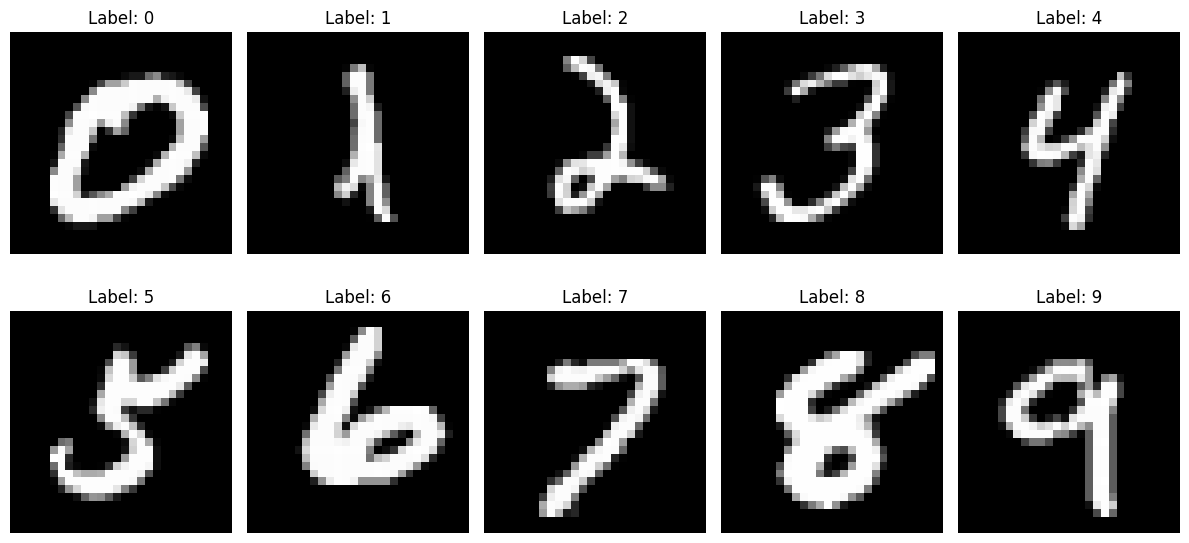

In [33]:
plt.figure(figsize=(12, 6))

# Loop through each category and select one random example
for i, category in enumerate(categories):
    # Find indices of all samples in the current category
    indices = np.where(y_test == category)[0]

    # Randomly select one index from the current category
    random_index = np.random.choice(indices)

    # Extract the image and label
    image = x_test[random_index]
    label = y_test[random_index]

    # Plot the image
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

# Display the figure
plt.tight_layout()
plt.show()


# 2. Data Processing

## 2.1 Subsetting

Create a 10% random subset of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?

Now subset the **first** 10% of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?

When reducing dataset size, what differences might you expect to see in results between randomly selecting samples versus selecting the first portion of the dataset? Is this borne out by the subsets you just created? How does the distribution of the labels in the various subsampled datasets compare to the distribution of the full datasets?

Why might subsampling a dataset be beneficial when developing machine learning models? Discuss the trade-offs.

## 2.2 Feature Engineering

What are the features versus the output in this assignment? Why is it important to distinguish between features (inputs) and outputs (labels) in a machine learning model?

Select all train images labeled "3". Create a single, pixel-wise average image of all of these images. Plot the 2D mean and standard deviation images for category 3 in both the training and testing sets. Comment on the differences between the mean and standard deviation images between the training and testing datasets. Plot the 2D mean and standard deviation images for category "3" in the training and testing sets for the binarized images.

Now repeat this for a new label (e.g., "7"). Comment on the differences between the mean and standard deviation images between the training and testing datasets for the binarized images.

Binarize both of the images from the previous question by setting pixel values equal to 1 if they are greater than the mean value for that pixel and equal to 0 if they are less than the mean value for that pixel.

In plain English, what are we actually **doing** when we binarize an image? How does the new pixel value relate to the pixel value of the original image and the mean value for that pixel across all images with that label?

What is the index of the most **dissimilar** image in category "3" in the training set for the regular images? What about the most **similar** image? Does this change for the binarized images? If so, why? Make sure to plot all four images with approproate labels.

What do you think the effect of binarizing these images is from a machine learning perspective? How does binarization of images (converting pixel values to 0 or 1 based on a threshold) affect the representation of features, and what might be the benefits and limitations of this approach?

How does what you've just done relate to the idea of standardizing data? Why might it be important to standardize our data before using it to train a model?

Describe how calculating a pixel-wise mean or standard deviation for a set of images can help you understand variations within a category. What does a high standard deviation indicate in this context?

# 3. Model Training, Validation, and Intepretation

## 3.1 Support Vector Machine

From the training dataset, select only images from categories "3" and "9".Subdivide the data into Set1 and Set2, with 60% of the data in Set1 and 40% in Set2. Replace category labels with 0 for 3 and 1 for 9.
Use Set1 to train a linear support vector machine classifier with default parameters and predict the class labels for Set2. What is the prediction accuracy using the model trained on the training set? What is the prediction accuracy using the model trained on the testing set?

## 3.2 Modeling with Engineered Data

We describe each image by using a reduced set of features (compared to n = 784 initial features for each pixel value) as follows:

- Binarize the image by setting the pixel values to 1 if they are greater than 128 and 0 otherwise.
- For each image row i, find n_i, the sum of 1's in the row (28 features).
- For each image column j, find n_j, the sum of 1's in the column (28 features).
- Concatenate these features to form a feature vector of 56 features.

What is the prediction accuracy using an SVM model trained on the training set? What is the prediction accuracy using an SVM model trained on the testing set? How about the prediction accuracy of a KNN model trained on the training set? And on the testing set? What does this tell you about the potential impacts of feature engineering?

## 3.3 K-Nearest Neighbors

In the training and testing datasets, select images in the categories 1, 3, 5, 7, and 9. Train a k-NN classifier using 4 to 40 nearest neighbors, with a step size of 4.

For k = 4, what is the label that was predicted with lowest accuracy?

For k = 20, what is the label that was predicted with lowest accuracy?

What is the label pair that was confused most often (i.e., class A is labeled as B, and vice versa)?

Visualize 5 mislabeled samples with their actual and predicted labels.

Based on the patterns in the pixel values for each category, which labels (numbers) do you think the model might struggle to identify or distinguish from one another? Explain why certain labels might be more challenging to separate, considering the similarity in pixel patterns or shapes.

## 3.4 Comprehension Questions

Why is it important to have separate training and testing datasets? What potential issues arise if you use the same data for both training and evaluation?

If you achieve a high accuracy on the training set but a lower accuracy on the testing set, what might this indicate about your model’s performance and generalization?